### 1. Background

To enable the construction of calibration curves for each of the peaks, we need to know which peak corresponds to which MW. To this end, the raw data (intensity in function of retention time) can be exported as a .csv file from the computer coupled to the HPLC. Next to this chromatogram, a mass spectrum was obtained for PEG 200, 300, 400 and 1000. Matching the intensity of the MS peaks to the ELSD peaks then gives us a very good estimation of the peak identification.

### 2. PEG monomers

Below, the MWs of the different PEG monomers used are shown in a table. The general formula for the molecular weight of PEG is (44*n + 18).

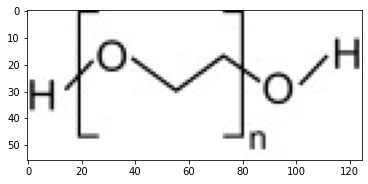

In [1]:
import pandas as pd
import numpy as np
import glob 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('PEG_formula.jpg')
imgplot = plt.imshow(img)
plt.show()

In [2]:
x = range(1,31,1)       # n-values of the polymers
y = range(62,1382,44)   # molecular weights of polymers

datas = {'oligomer n-value': x,
       'oligomer MW (g/mol)':y}
dataframe = pd.DataFrame(data=datas)
hidden = dataframe.style.hide_index() # command used to hide the row index (which can be confusing here)
hidden

oligomer n-value,oligomer MW (g/mol)
1,62
2,106
3,150
4,194
5,238
6,282
7,326
8,370
9,414
10,458


### 3. Importing the data

In [3]:
# getting csv files from the specified folder
# double backslashes are used because a single backslash is used as an end statement in python

path = 'C:\\Users\\cdierend\\OneDrive - UGent\\Universiteit Gent\\Research\\FWO Biostable\\6_MWCO\\Exp_6.1\\2_RawData\\20220203_NF_standards_individual\\Chromatograms\\'
filenames = glob.glob(path + "\*.csv")

dataframes_list = []

# for loop to iterate over all csv files in the specified folder

for file in filenames: 
    temp_df = pd.read_csv(file, encoding = "UTF-16", sep = '\t', decimal = ',', names = ["Retention_time","Intensity"])
    temp_df['Retention_time'] = pd.to_numeric(temp_df['Retention_time'])
    temp_df['Intensity'] = pd.to_numeric(temp_df['Intensity'])
    index = temp_df.index
    index.name = file
    dataframes_list.append(temp_df)
    
    
for dataset in dataframes_list:
    display(dataset)

,Retention_time,Intensity
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Research\FWO Biostable\6_MWCO\Exp_6.1\2_RawData\20220203_NF_standards_individual\Chromatograms\20220208_CD_NF_PEG_1000_400_PPM_CHROM.CSV,,
0,0.000000,-0.632
1,0.001667,-0.626
2,0.003333,-0.621
3,0.005000,-0.621
4,0.006667,-0.624
...,...,...
18608,31.013333,0.346
18609,31.015000,0.356
18610,31.016667,0.354


,Retention_time,Intensity
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Research\FWO Biostable\6_MWCO\Exp_6.1\2_RawData\20220203_NF_standards_individual\Chromatograms\20220208_CD_NF_PEG_200_400_PPM_CHROM.CSV,,
0,0.000000,-0.742
1,0.001667,-0.690
2,0.003333,-0.636
3,0.005000,-0.581
4,0.006667,-0.527
...,...,...
18606,31.010000,-0.510
18607,31.011667,-0.515
18608,31.013333,-0.519


,Retention_time,Intensity
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Research\FWO Biostable\6_MWCO\Exp_6.1\2_RawData\20220203_NF_standards_individual\Chromatograms\20220208_CD_NF_PEG_300_400_PPM_CHROM.CSV,,
0,0.000000,-0.311
1,0.001667,-0.344
2,0.003333,-0.380
3,0.005000,-0.420
4,0.006667,-0.460
...,...,...
18601,31.001667,0.198
18602,31.003333,0.132
18603,31.005000,0.090


,Retention_time,Intensity
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Research\FWO Biostable\6_MWCO\Exp_6.1\2_RawData\20220203_NF_standards_individual\Chromatograms\20220208_CD_NF_PEG_400_400_PPM_CHROM.CSV,,
0,0.000000,-0.077
1,0.001667,-0.075
2,0.003333,-0.085
3,0.005000,-0.105
4,0.006667,-0.132
...,...,...
18607,31.011667,0.869
18608,31.013333,0.978
18609,31.015000,1.106


### 4. Plotting the chromatograms

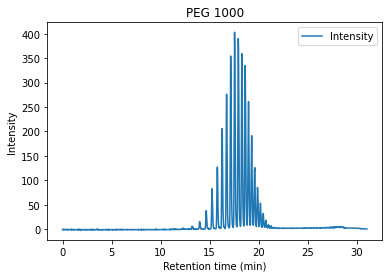

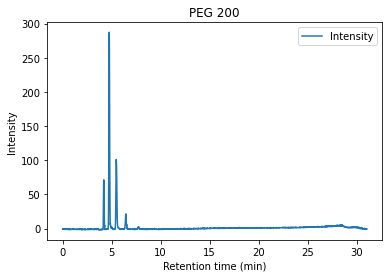

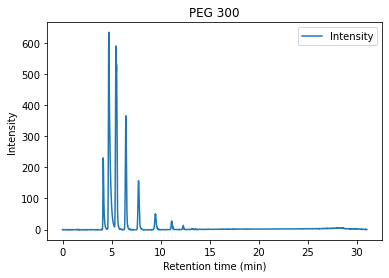

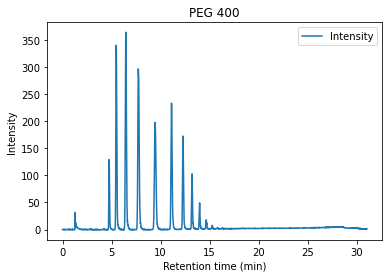

In [4]:
titles = ['PEG 1000', 'PEG 200', 'PEG 300', 'PEG 400']


for chrom,i in zip(dataframes_list,titles):
    chrom.plot(x="Retention_time", y="Intensity")
    plt.xlabel('Retention time (min)')
    plt.ylabel('Intensity')
    plt.title(i)
    plt.show
    

# try to find the retention times of all the peaks in the graph by looking for local maxima

Text(0, 0.5, 'Intensity')

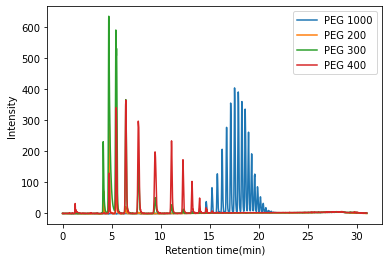

In [5]:
# plotting the chromatograms of the standards on the same figure to see the overlap

legend_elements = ["PEG 1000", "PEG 200", "PEG 300", "PEG 400"]

fig, ax = plt.subplots()

for df,leg in zip(dataframes_list,legend_elements):
    
    df.set_index('Retention_time',drop=True,inplace=True)
    ax.plot(df,label=leg)
    
ax.legend(loc='upper right')
ax.set_xlabel('Retention time(min)')
ax.set_ylabel('Intensity')



### 5. Comparing with mass spectrometry data

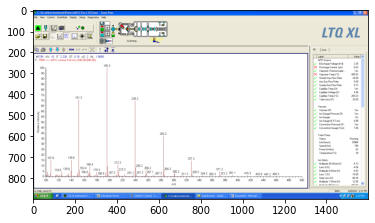

In [6]:
img = mpimg.imread('MS_PEG_200.png')
imgplot = plt.imshow(img)
plt.show()

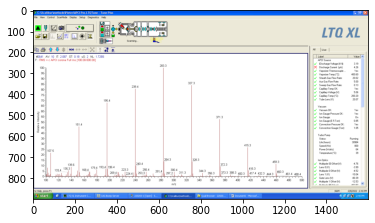

In [7]:
img = mpimg.imread('MS_PEG_300.png')
imgplot = plt.imshow(img)
plt.show()

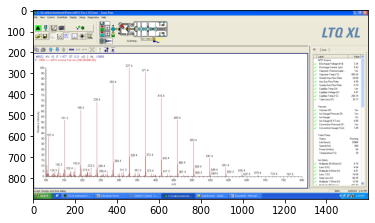

In [8]:
img = mpimg.imread('MS_PEG_400.png')
imgplot = plt.imshow(img)
plt.show()

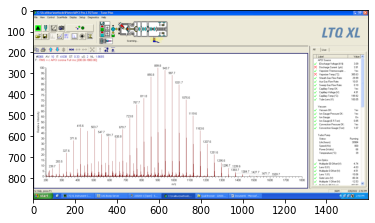

In [9]:
img = mpimg.imread('MS_PEG_1000.png')
imgplot = plt.imshow(img)
plt.show()

PEG 1000 seems to have a bimodal distribution, however this is not the case. The peaks on the left are still remains from the PEG 400 injected into the MS manually just before PEG 1000 was analyzed.

### 6. Matching retention times with molecular weights

Using the MS spectra and the HPLC-ELSD chromatograms, it's possible to match the retention times with the molecular weight of the PEG oligomer. We first import data exported from the HPLC-ELSD computer containing retention times and areas for the individual standards (PEG 200, 300, 400, 1000). After exploring this data, we will define retention times for the peaks of a certain MW in this method. For future reference, these retention times will be used.

In [10]:
path_2 = 'C:\\Users\\cdierend\\OneDrive - UGent\\Universiteit Gent\\Research\\FWO Biostable\\6_MWCO\\Exp_6.1\\2_RawData\\20220203_NF_standards_individual\\Areas\\'
recordnames = glob.glob(path_2 + "\*.csv")

dataframes_list_2 = []

# for loop to iterate over all csv files in the specified folder

for record in recordnames: 
    temp_df_2 = pd.read_csv(record, encoding = "UTF-16", sep = '\t', decimal = ',', names = ["Peak number","Ret time", "Area"])
    temp_df_2['Ret time'] = pd.to_numeric(temp_df_2['Ret time'])
    temp_df_2['Area'] = pd.to_numeric(temp_df_2['Area'])
    index = temp_df_2.index
    index.name = record
    dataframes_list_2.append(temp_df_2)
    
    
for entry in dataframes_list_2:
    display(entry)

,Peak number,Ret time,Area
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Research\FWO Biostable\6_MWCO\Exp_6.1\2_RawData\20220203_NF_standards_individual\Areas\20220203_CD_NF_PEG_1000_400_PPM.CSV,,,
0,1,14.641977,249.834137
1,2,15.234059,501.050690
2,3,15.775187,893.210693
3,4,16.267794,1361.445679
4,5,16.721390,1858.438110
5,6,17.138672,2412.750732
6,7,17.536283,2784.857910
7,8,17.914919,2776.780273
8,9,18.276821,2623.894531


,Peak number,Ret time,Area
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Research\FWO Biostable\6_MWCO\Exp_6.1\2_RawData\20220203_NF_standards_individual\Areas\20220203_CD_NF_PEG_200_400_PPM.CSV,,,
0,1,4.198792,342.776154
1,2,4.758428,1592.418457
2,3,5.476115,698.682617
3,4,6.447296,150.339767


,Peak number,Ret time,Area
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Research\FWO Biostable\6_MWCO\Exp_6.1\2_RawData\20220203_NF_standards_individual\Areas\20220203_CD_NF_PEG_300_400_PPM.CSV,,,
0,1,4.147936,1405.217529
1,2,4.713527,6914.807617
2,3,5.435428,6034.434570
3,4,6.449708,2884.088867
4,5,7.741757,1447.409302
5,6,9.452208,533.349487
6,7,11.111934,237.132034
7,8,12.301133,86.384361


,Peak number,Ret time,Area
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Research\FWO Biostable\6_MWCO\Exp_6.1\2_RawData\20220203_NF_standards_individual\Areas\20220203_CD_NF_PEG_400_400_PPM.CSV,,,
0,1,4.754195,626.714111
1,2,5.474566,2235.916260
2,3,6.450493,2969.823486
3,4,7.724780,2897.552002
4,5,9.431342,2262.337891
5,6,11.108264,1926.967651
6,7,12.272523,1249.537720
7,8,13.196136,659.782837
8,9,13.970251,276.348083


In [24]:
# assignment of retention times with molecular weights is done manually/visually

PEG_200 = {'Peak time':[4.20, 4.76, 5.48, 6.45],'Molecular weight':[150,194,238,282]}

PEG_300 = {'Peak time':[4.20, 4.76, 5.48, 6.45, 7.74, 9.45, 11.11, 12.30 ],'Molecular weight':[150, 194, 238, 282, 326, 370, 414, 458]}

PEG_400 = {'Peak time':[4.76, 5.48, 6.45, 7.74, 9.45, 11.11, 12.30, 13.20, 13.97, 14.63],'Molecular weight':[194, 238, 282, 326, 370, 414, 458, 502, 546, 590]}

PEG_1000 = {'Peak time':[14.63, 15.23, 15.78, 16.27, 16.72, 17.14, 17.54, 17.91, 18.28, 18.61, 18.96, 19.27, 19.59, 19.87, 20.17, 20.45, 20.72],'Molecular weight':[590, 634, 678, 722, 766, 810, 854, 898, 942, 986, 1030, 1074, 1118, 1162, 1206, 1250, 1294 ]}

df_200 = pd.DataFrame(data=PEG_200)
df_200t = df_200.style.set_caption("PEG 200")
df_200t



,Peak time,Molecular weight
0,4.200000,150
1,4.760000,194
2,5.480000,238
3,6.450000,282


In [25]:
df_300 = pd.DataFrame(data=PEG_300)
df_300t = df_300.style.set_caption("PEG 300")
df_300t

,Peak time,Molecular weight
0,4.200000,150
1,4.760000,194
2,5.480000,238
3,6.450000,282
4,7.740000,326
5,9.450000,370
6,11.110000,414
7,12.300000,458


In [26]:
df_400 = pd.DataFrame(data=PEG_400)
df_400t = df_400.style.set_caption("PEG 400")
df_400t

,Peak time,Molecular weight
0,4.760000,194
1,5.480000,238
2,6.450000,282
3,7.740000,326
4,9.450000,370
5,11.110000,414
6,12.300000,458
7,13.200000,502
8,13.970000,546
9,14.630000,590


In [27]:
df_1000 = pd.DataFrame(data=PEG_1000)
df_1000t = df_1000.style.set_caption("PEG 1000")
df_1000t

,Peak time,Molecular weight
0,14.630000,590
1,15.230000,634
2,15.780000,678
3,16.270000,722
4,16.720000,766
5,17.140000,810
6,17.540000,854
7,17.910000,898
8,18.280000,942
9,18.610000,986


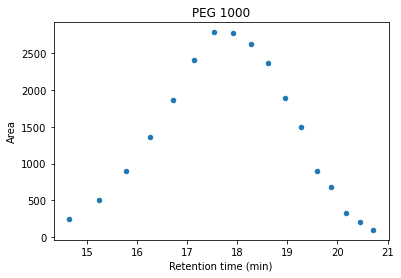

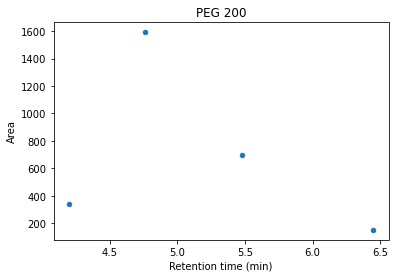

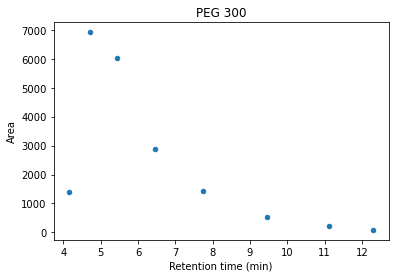

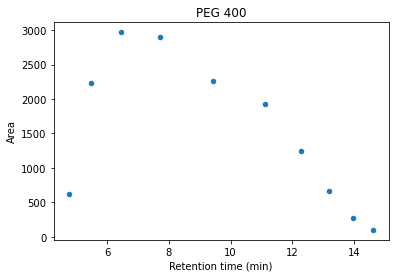

In [11]:
# the plot below just visualizes the area that is reported per retention time
# make sure to never use the same variable name twice, it can cause problems when running the script
# hence 'titles', is changed to the Spanish 'titulos' here

titulos = ['PEG 1000', 'PEG 200', 'PEG 300', 'PEG 400']

for entry,k in zip(dataframes_list_2,titulos):
    entry.plot.scatter(x="Ret time", y="Area")
    plt.xlabel('Retention time (min)')
    plt.ylabel('Area')
    plt.title(k)
    plt.show

KeyError: 'Ret time'

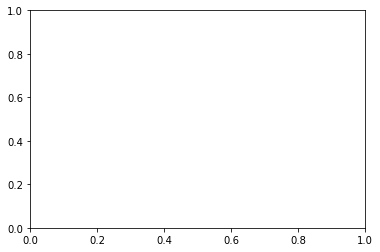

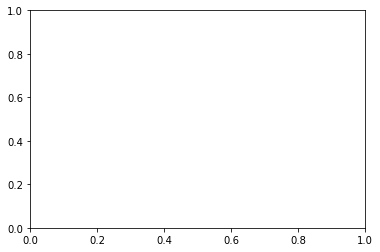

In [12]:
# plotting the retention times and areas of the standards on the same figure to see the overlap

legend_entries = ["PEG 1000", "PEG 200", "PEG 300", "PEG 400"]

fig, ax = plt.subplots()

for d,l in zip(dataframes_list_2,legend_entries):
    
    d.set_index("Ret time",drop=True,inplace=True)
    d.plot.scatter(x="Ret time", y="Area",label=l)
    
    
ax.legend(loc='upper right')
ax.set_xlabel('Retention time(min)')
ax.set_ylabel('Area')

In [ ]:
# just manually enter the retention times below corresponding to a certain MW in a python DataFrame... 
# I give up trying to code this...